## Gabigol's results

In [1]:
import pandas as pd

hp_tunning_results = pd.read_csv('best_models.csv')

hp_tunning_results.sort_values(by = 'Scores', ascending = False).reset_index(drop = True).iloc[9,0]

'GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=5,\n                           min_samples_split=10, n_estimators=500)'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.feature_selection import RFECV   
from precision_recall_cutoff import precision_recall_cutoff as prc
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt    
from tqdm import tqdm
import pandas as pd
import numpy as np  


pd.options.display.max_rows = 999
pd.options.display.max_columns = 999



train_data = pd.read_csv('diabetes_full_train.csv')

In [3]:

X = train_data.drop(columns = 'Diabetes_012')




y = train_data.Diabetes_012.astype(np.uint8)
n_classes = len(set(y))

Y = label_binarize(train_data.Diabetes_012, classes=[*range(n_classes)])

results_to_append = []
for i in tqdm(range(0,1)):


    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2)
    X_val, X_test, Y_val, Y_test = train_test_split(X, Y, test_size = 0.5)

    
    
    
    
    DTC_X_train = X_train[['Interaction_1',
    'Log_BMI',
    'Veggies',
    'Smoker',
    'PhysActivity',
    'MentHlth',
    'Interaction_5',
    'HeartDiseaseorAttack']]
    
    DTC_X_train_top_6 = DTC_X_train[DTC_X_train.columns[0:6]]
    DTC_X_train_top_7 = DTC_X_train[DTC_X_train.columns[0:7]]
    

    RF_X_train = X_train[['Interaction_1',
    'Log_BMI',
    'PhysHlth',
    'MentHlth',
    'Fruits',
    'Age',
    'Smoker',
    'College_1_3']]
    
 
    RF_X_train_top_6 = RF_X_train[RF_X_train.columns[0:6]]
    RF_X_train_top_7 = RF_X_train[RF_X_train.columns[0:7]]

    ADA_DTC_X_train = X_train[['Interaction_1',
    'Log_BMI',
    'Veggies',
    'Stroke',
    'Smoker',
    'Male',
    'Female',
    'PhysHlth',
    'Interaction_5']]
    
    ADA_DTC_X_train_top_6 = ADA_DTC_X_train[ADA_DTC_X_train.columns[0:6]]
    ADA_DTC_X_train_top_7 = ADA_DTC_X_train[ADA_DTC_X_train.columns[0:7]]
    
    GBC_X_train = X_train[['Tree_1',
                      'Log_BMI',
                      'Interaction_5',
                      'Interaction_3',
                      'Interaction_1',
                      'GenHlth',
                      'Age',
                      '75,000+']]
    
    GBC_X_train_top_6 = GBC_X_train[GBC_X_train.columns[0:6]]
    GBC_X_train_top_7 = GBC_X_train[GBC_X_train.columns[0:7]]
    
    
    
    
    DTC_X_val = X_val[['Interaction_1',
    'Log_BMI',
    'Veggies',
    'Smoker',
    'PhysActivity',
    'MentHlth',
    'Interaction_5',
    'HeartDiseaseorAttack']]
    
    DTC_X_val_top_6 = DTC_X_val[DTC_X_val.columns[0:6]]
    DTC_X_val_top_7 = DTC_X_val[DTC_X_val.columns[0:7]]
    

    RF_X_val = X_val[['Interaction_1',
    'Log_BMI',
    'PhysHlth',
    'MentHlth',
    'Fruits',
    'Age',
    'Smoker',
    'College_1_3']]
    
 
    RF_X_val_top_6 = RF_X_val[RF_X_val.columns[0:6]]
    RF_X_val_top_7 = RF_X_val[RF_X_val.columns[0:7]]

    ADA_DTC_X_val = X_val[['Interaction_1',
    'Log_BMI',
    'Veggies',
    'Stroke',
    'Smoker',
    'Male',
    'Female',                    
    'PhysHlth',
    'Interaction_5']]
    
    ADA_DTC_X_val_top_6 = ADA_DTC_X_val[ADA_DTC_X_val.columns[0:6]]
    ADA_DTC_X_val_top_7 = ADA_DTC_X_val[ADA_DTC_X_val.columns[0:7]]
    
    GBC_X_val = X_val[['Tree_1',
    'Log_BMI',
    'Interaction_5',
    'Interaction_3',
    'Interaction_1',
    'GenHlth',
    'Age',
    '75,000+']]
    
    GBC_X_val_top_6 = GBC_X_val[GBC_X_val.columns[0:6]]
    GBC_X_val_top_7 = GBC_X_val[GBC_X_val.columns[0:7]]
    
    
    DTC_X_test = X_test[['Interaction_1',
    'Log_BMI',
    'Veggies',
    'Smoker',
    'PhysActivity',
    'MentHlth',
    'Interaction_5',
    'HeartDiseaseorAttack']]
    
    DTC_X_test_top_6 = DTC_X_test[DTC_X_test.columns[0:6]]
    DTC_X_test_top_7 = DTC_X_test[DTC_X_test.columns[0:7]]
    

    RF_X_test = X_test[['Interaction_1',
    'Log_BMI',
    'PhysHlth',
    'MentHlth',
    'Fruits',
    'Age',
    'Smoker',
    'College_1_3']]
    
 
    RF_X_test_top_6 = RF_X_test[RF_X_test.columns[0:6]]
    RF_X_test_top_7 = RF_X_test[RF_X_test.columns[0:7]]

    ADA_DTC_X_test = X_test[['Interaction_1',
    'Log_BMI',
    'Veggies',
    'Stroke',
    'Smoker',
    'Male',
    'Female',
    'PhysHlth',
    'Interaction_5']]
    
    ADA_DTC_X_test_top_6 = ADA_DTC_X_test[ADA_DTC_X_test.columns[0:6]]
    ADA_DTC_X_test_top_7 = ADA_DTC_X_test[ADA_DTC_X_test.columns[0:7]]
    
    GBC_X_test = X_test[['Tree_1',
    'Log_BMI',
    'Interaction_5',
    'Interaction_3',
    'Interaction_1',
    'GenHlth',
    'Age',
    '75,000+']]
    
    GBC_X_test_top_6 = GBC_X_test[GBC_X_test.columns[0:6]]
    GBC_X_test_top_7 = GBC_X_test[GBC_X_test.columns[0:7]]
    

    
    
    
    
    
    
    
    
    
    
    ADA_model_top_8 = OneVsRestClassifier(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                            min_samples_leaf=5,
                                                            min_samples_split=10),
                                                            learning_rate=0.1, 
                                                            n_estimators=100)).fit(ADA_DTC_X_train,Y_train)
    
    ADA_val_pred_top_8 = ADA_model_top_8.predict_proba(ADA_DTC_X_val)
    ADA_test_pred_top_8 = ADA_model_top_8.predict_proba(ADA_DTC_X_test)
    

    ADA_test_label_top_8 = ADA_model_top_8.predict(ADA_DTC_X_test)
    
    
    
    
    
    DTC_model_top_7 = OneVsRestClassifier(DecisionTreeClassifier(max_depth=5, 
                                                                 min_samples_leaf=5, 
                                                                 min_samples_split=10)).fit(DTC_X_train_top_7,Y_train)
    
    DTC_val_pred_top_7 = DTC_model_top_7.predict_proba(DTC_X_val_top_7)
    DTC_test_pred_top_7 = DTC_model_top_7.predict_proba(DTC_X_test_top_7)
    
    DTC_test_label_top_7 = DTC_model_top_7.predict(DTC_X_test_top_7)
    
    
    
    
    
    
    
    RF_model_top_6 = OneVsRestClassifier(RandomForestClassifier(max_depth=7, 
                                                                min_samples_leaf=5, 
                                                                min_samples_split=15)).fit(RF_X_train_top_6,Y_train)
    
    RF_val_pred_top_6 = RF_model_top_6.predict_proba(RF_X_val_top_6)
    RF_test_pred_top_6 = RF_model_top_6.predict_proba(RF_X_test_top_6)
    
    RF_test_label_top_6 = RF_model_top_6.predict(RF_X_test_top_6)
    
    
    
    

    GBC_model_top_6 = OneVsRestClassifier(GradientBoostingClassifier(learning_rate=0.01, max_depth=5,
                                                                     min_samples_leaf=5,
                                                                     min_samples_split=10, 
                                                                     n_estimators=500)).fit(GBC_X_train_top_6,Y_train)
    
    GBC_val_pred_top_6 = GBC_model_top_6.predict_proba(GBC_X_val_top_6)
    GBC_test_pred_top_6 = GBC_model_top_6.predict_proba(GBC_X_test_top_6)
    
    GBC_test_label_top_6 = GBC_model_top_6.predict(GBC_X_test_top_6)
    
    
    
    
    X_ensemble_val = pd.concat([pd.DataFrame(ADA_val_pred_top_8),
                                pd.DataFrame(DTC_val_pred_top_7),
                                pd.DataFrame(RF_val_pred_top_6),
                                pd.DataFrame(GBC_val_pred_top_6)
                                              ], axis = 1)
    
    X_ensemble_test = pd.concat([pd.DataFrame(ADA_test_pred_top_8),
                                pd.DataFrame(DTC_test_pred_top_7),
                                pd.DataFrame(RF_test_pred_top_6),
                                pd.DataFrame(GBC_test_pred_top_6)
                                              ], axis = 1)
    
    

    
    
    GBC_ensemble = OneVsRestClassifier(GradientBoostingClassifier(learning_rate=0.01,
                                                                     max_depth=5,
                                                                     min_samples_leaf=5,
                                                                     min_samples_split=10, 
                                                                     n_estimators=500)).fit(X_ensemble_val, Y_val)
    
    GBC_ensemble_val_preds = GBC_ensemble.predict_proba(X_ensemble_val)    
    GBC_ensemble_test_preds = GBC_ensemble.predict_proba(X_ensemble_test)
    
    GBC_ensemble_test_label = GBC_ensemble.predict(X_ensemble_test)
    
    
    

    


    RF_ensemble = OneVsRestClassifier(RandomForestClassifier(max_depth=7, 
                                                                min_samples_leaf=5, 
                                                                min_samples_split=15)).fit(X_ensemble_val, Y_val)
    
    RF_ensemble_val_preds = RF_ensemble.predict_proba(X_ensemble_val)    
    RF_ensemble_test_preds = RF_ensemble.predict_proba(X_ensemble_test)
    
    RF_ensemble_test_label = RF_ensemble.predict(X_ensemble_test)
    









results_df = pd.DataFrame(columns = ['model','f1','cutoff'], data = results_to_append)



100%|██████████| 1/1 [13:04<00:00, 784.25s/it]


In [5]:
for i in range(0,3):
    print('class {}: '.format(i), f1_score(Y_test[:, i], ADA_test_label_top_8[:, i], average = 'weighted'))

class 0:  0.8124655902330569
class 1:  0.9730208785901876
class 2:  0.8282668679142239


In [6]:
for i in range(0,3):
    print('class {}: '.format(i), f1_score(Y_test[:, i], RF_test_label_top_6[:, i], average = 'weighted'))

class 0:  0.8047324381984544
class 1:  0.9725013621706721
class 2:  0.8191523656562624


In [8]:
for i in range(0,3):
    print('class {}: '.format(i), f1_score(Y_test[:, i], DTC_test_label_top_7[:, i], average = 'weighted'))

class 0:  0.8093270403651479
class 1:  0.9725013621706721
class 2:  0.8191697394520304


In [9]:
for i in range(0,3):
    print('class {}: '.format(i), f1_score(Y_test[:, i], GBC_test_label_top_6[:, i], average = 'weighted'))

class 0:  0.8091708143422417
class 1:  0.9725013621706721
class 2:  0.8269182345004082


In [10]:
for i in range(0,3):
    print('class {}: '.format(i), f1_score(Y_test[:, i], GBC_ensemble_test_label[:, i], average = 'weighted'))

class 0:  0.8170789149803589
class 1:  0.9736072992091238
class 2:  0.8316399571275617


In [11]:
for i in range(0,3):
    print('class {}: '.format(i), f1_score(Y_test[:, i], RF_ensemble_test_label[:, i], average = 'weighted'))

class 0:  0.8160045442463809
class 1:  0.9729537289379256
class 2:  0.8315113616424645


In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

precision = dict()
recall = dict()

plt.figure(figsize = (15,10))
for i in range(n_classes):

        precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], ADA_val_pred_top_8[:, i])
        
        
        
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

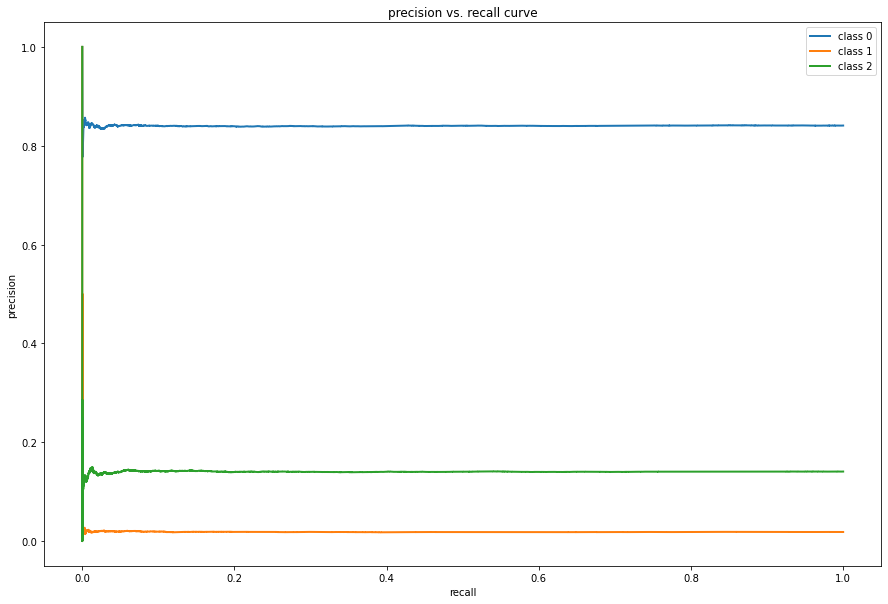

In [38]:
from sklearn.metrics import precision_recall_curve, f1_score

precision = dict()
recall = dict()

plt.figure(figsize = (15,10))
for i in range(n_classes):

        precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], RF_val_pred_top_6[:, i])
        
        
        
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

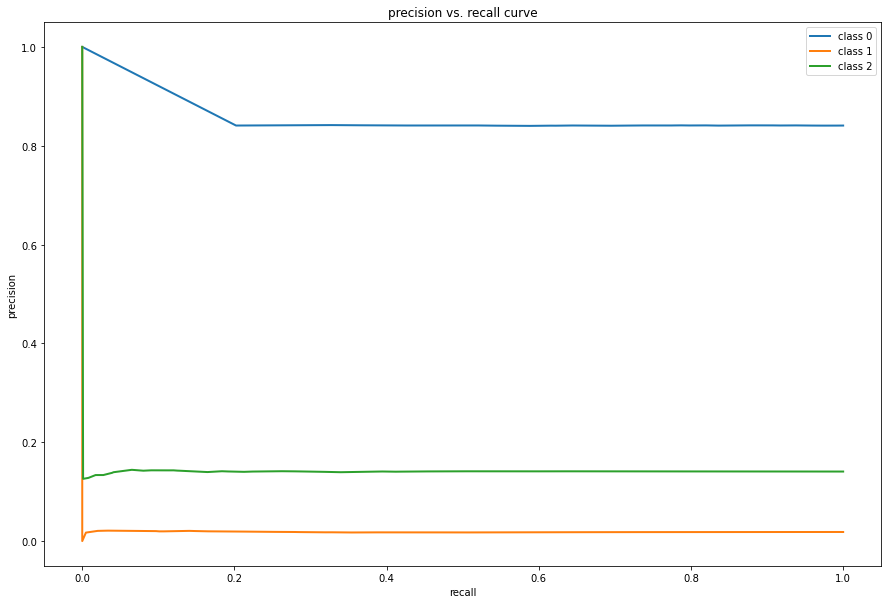

In [39]:
from sklearn.metrics import precision_recall_curve, f1_score

precision = dict()
recall = dict()

plt.figure(figsize = (15,10))
for i in range(n_classes):

        precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], DTC_val_pred_top_7[:, i])
        
        
        
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

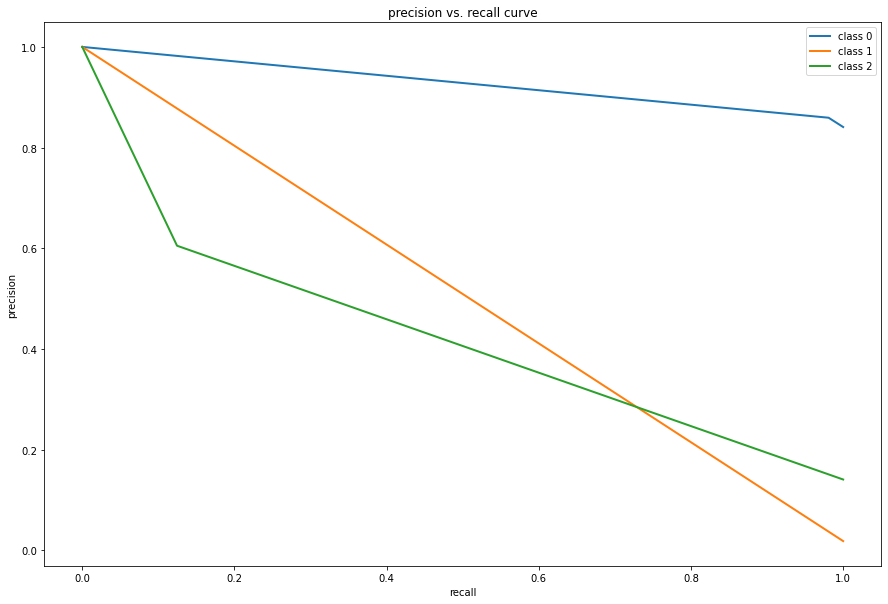

In [40]:





from sklearn.metrics import precision_recall_curve, f1_score

precision = dict()
recall = dict()

plt.figure(figsize = (15,10))
for i in range(n_classes):

        precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], GBC_val_label_top_6[:, i])
        
        
        
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

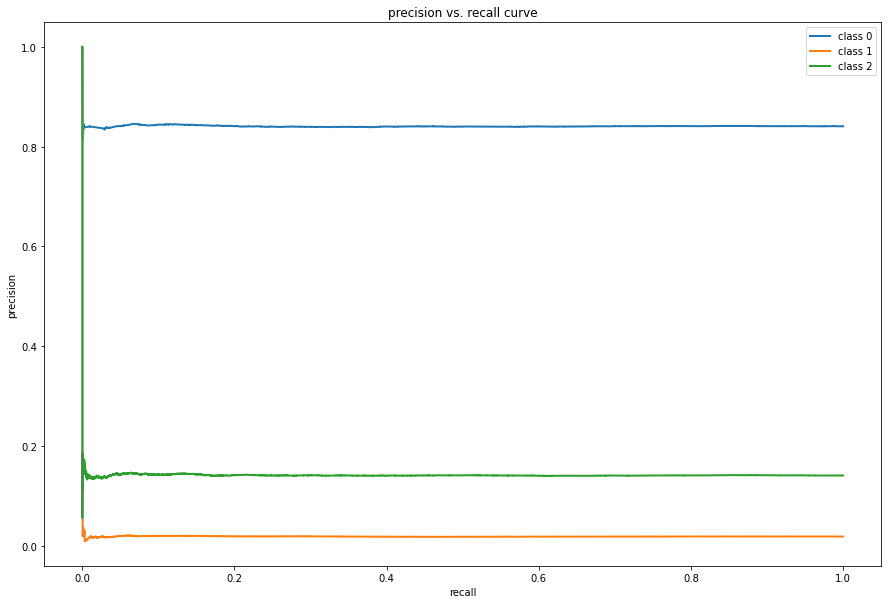

In [41]:
from sklearn.metrics import precision_recall_curve, f1_score

precision = dict()
recall = dict()

plt.figure(figsize = (15,10))
for i in range(n_classes):

        precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], GBC_ensemble_val_preds[:, i])
        
        
        
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

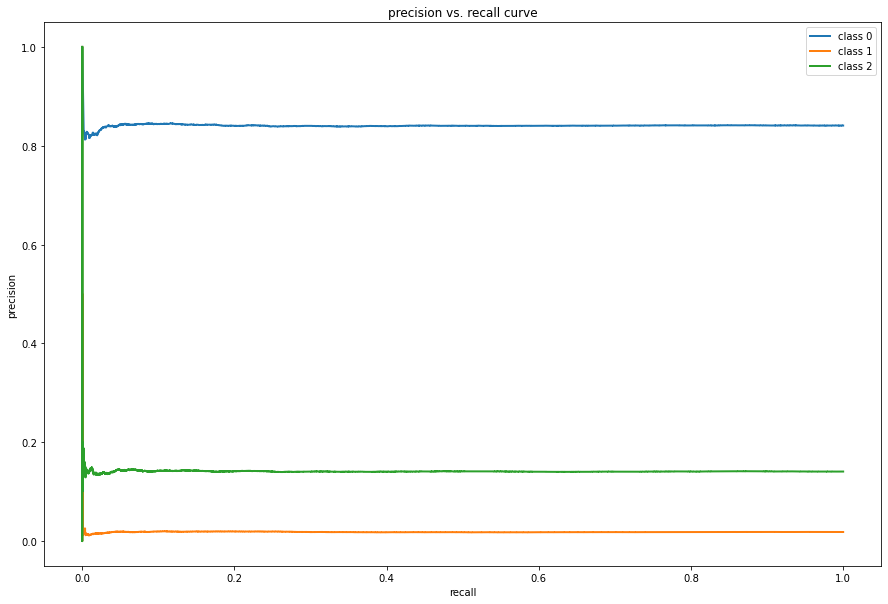

In [42]:
from sklearn.metrics import precision_recall_curve, f1_score

precision = dict()
recall = dict()

plt.figure(figsize = (15,10))
for i in range(n_classes):

        precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], RF_ensemble_val_preds[:, i])
        
        
        
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

0.8112950853617537